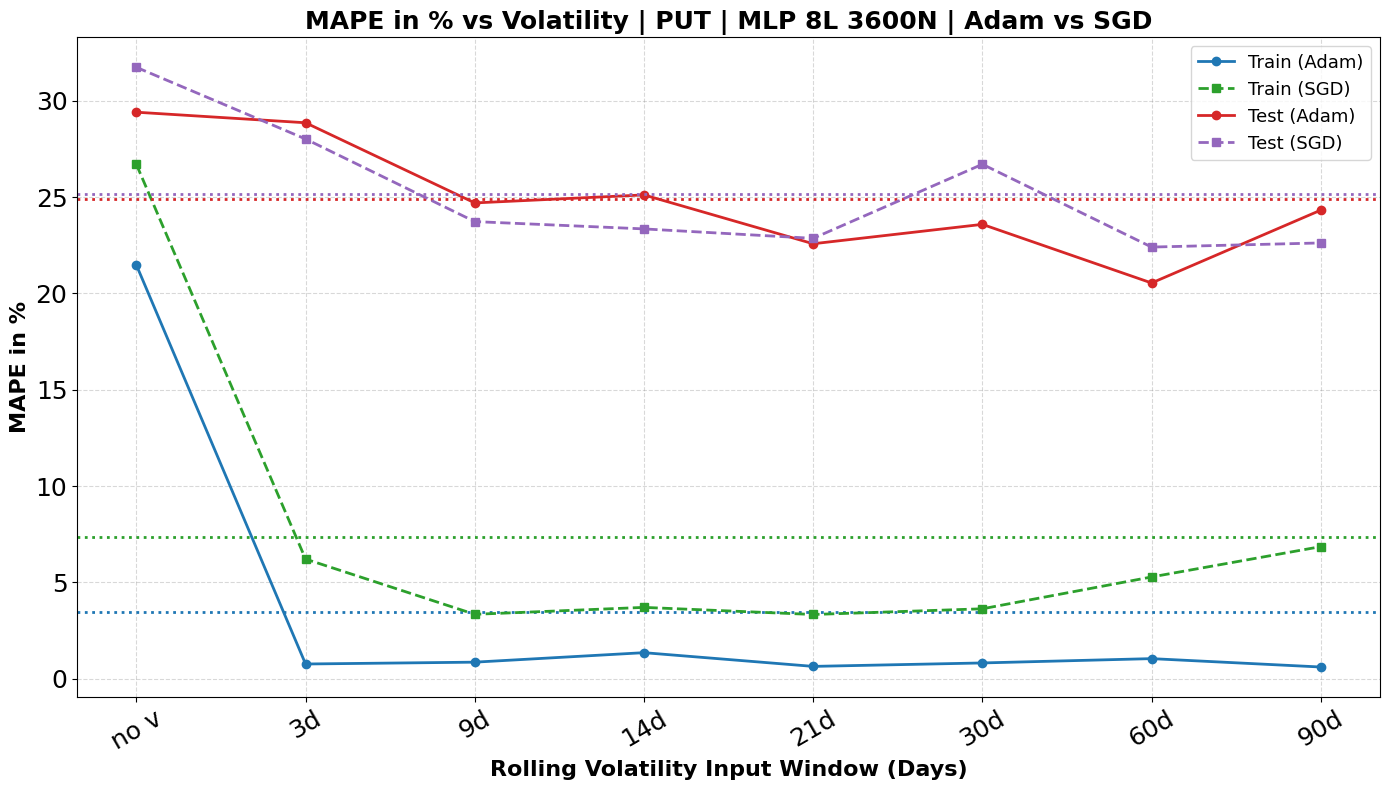

Saved:MLPvola.pdf


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data = [
    [ 21.4772, 29.4133],
    [ 26.7032, 31.7442],
    [ 0.7567, 28.8648],
    [6.2056, 28.0220],
    [ 0.8522, 24.7021],
    [ 3.3370, 23.7325],
    [ 1.3452, 25.1178],
    [ 3.6968, 23.3525],
    [ 0.6326, 22.5814],
    [ 3.3283, 22.8628],
    [ 0.8113, 23.5886],
    [ 3.6237, 26.7093],
    [ 1.0357, 20.5442],
    [ 5.2767, 22.4091],
    [0.6001, 24.3274],
    [ 6.8520, 22.6236]
]

models = [
    "(3600, no v - Adam)", 
    "(3600, no v - SGD)", 
    "(3600, with 3d v - Adam)", 
    "(3600, with 3d v - SGD)", 
    "(3600, with 9d v - Adam)", 
    "(3600, with 9d v - SGD)", 
    "(3600, with 14d v - Adam)", 
    "(3600, with 14d v - SGD)", 
    "(3600, with 21d v - Adam)", 
    "(3600, with 21d v - SGD)", 
    "(3600, with 30d v - Adam)", 
    "(3600, with 30d v - SGD)", 
    "(3600, with 60d v - Adam)", 
    "(3600, with 60d v - SGD)", 
    "(3600, with 90d v - Adam)", 
    "(3600, with 90d v - SGD)"
]

columns = ["Put Train", "Put Test"]
df = pd.DataFrame(data, index=models, columns=columns)



def extract_volatility(name):
    m = re.search(r"with (\d+d) v", name)
    return m.group(1) if m else ("no v" if "no v" in name else None)

def extract_opt(name):
    return "Adam" if "Adam" in name else "SGD"


df["Volatility"] = df.index.map(extract_volatility)
df["Optimizer"]  = df.index.map(extract_opt)

vol_order = ["no v", "3d", "9d", "14d", "21d", "30d", "60d", "90d"]
df["Volatility"] = pd.Categorical(df["Volatility"], categories=vol_order, ordered=True)

df_adam = df[df["Optimizer"] == "Adam"].copy().sort_values("Volatility")
df_sgd  = df[df["Optimizer"] == "SGD"].copy().sort_values("Volatility")



fig, ax = plt.subplots(figsize=(14, 8))

colors = {
    "Adam_Train": "#1f77b4",   # Blue
    "SGD_Train":  "#2ca02c",   # Green
    "Adam_Test":  "#d62728",   # Red
    "SGD_Test":   "#9467bd"    # Purple
}


ax.plot(
    df_adam["Volatility"], df_adam["Put Train"],
    color=colors["Adam_Train"], marker='o', linewidth=2,
    label="Train (Adam)"
)
ax.axhline(
    df_adam["Put Train"].mean(),
    color=colors["Adam_Train"], linestyle=":", linewidth=2
)


ax.plot(
    df_sgd["Volatility"], df_sgd["Put Train"],
    color=colors["SGD_Train"], marker='s', linestyle='--', linewidth=2,
    label="Train (SGD)"
)
ax.axhline(
    df_sgd["Put Train"].mean(),
    color=colors["SGD_Train"], linestyle=":", linewidth=2
)


ax.plot(
    df_adam["Volatility"], df_adam["Put Test"],
    color=colors["Adam_Test"], marker='o', linewidth=2,
    label="Test (Adam)"
)
ax.axhline(
    df_adam["Put Test"].mean(),
    color=colors["Adam_Test"], linestyle=":", linewidth=2
)

ax.plot(
    df_sgd["Volatility"], df_sgd["Put Test"],
    color=colors["SGD_Test"], marker='s', linestyle='--', linewidth=2,
    label="Test (SGD)"
)
ax.axhline(
    df_sgd["Put Test"].mean(),
    color=colors["SGD_Test"], linestyle=":", linewidth=2
)



ax.set_facecolor("#ffffff")
ax.grid(True, linestyle="--", alpha=0.3, color="gray")

ax.set_xlabel(
    "Rolling Volatility Input Window (Days)",
    fontsize=16, fontweight="bold"
)
ax.set_ylabel(
    "MAPE in %",
    fontsize=16, fontweight="bold"
)

ax.set_title(
    "MAPE in % vs Volatility | PUT | MLP 8L 3600N | Adam vs SGD",
    fontsize=18, fontweight="bold"
)

ax.tick_params(axis="x", rotation=30, labelsize=18)
ax.tick_params(axis="y", labelsize=18)

for spine in ax.spines.values():
    spine.set_color("black")

ax.legend(fontsize=13)

plt.tight_layout()
plt.savefig(
    "MLPvola.pdf",
    format="pdf",
    bbox_inches="tight",
    facecolor=fig.get_facecolor()
)

plt.show()
plt.close()
print("Saved:MLPvola.pdf")


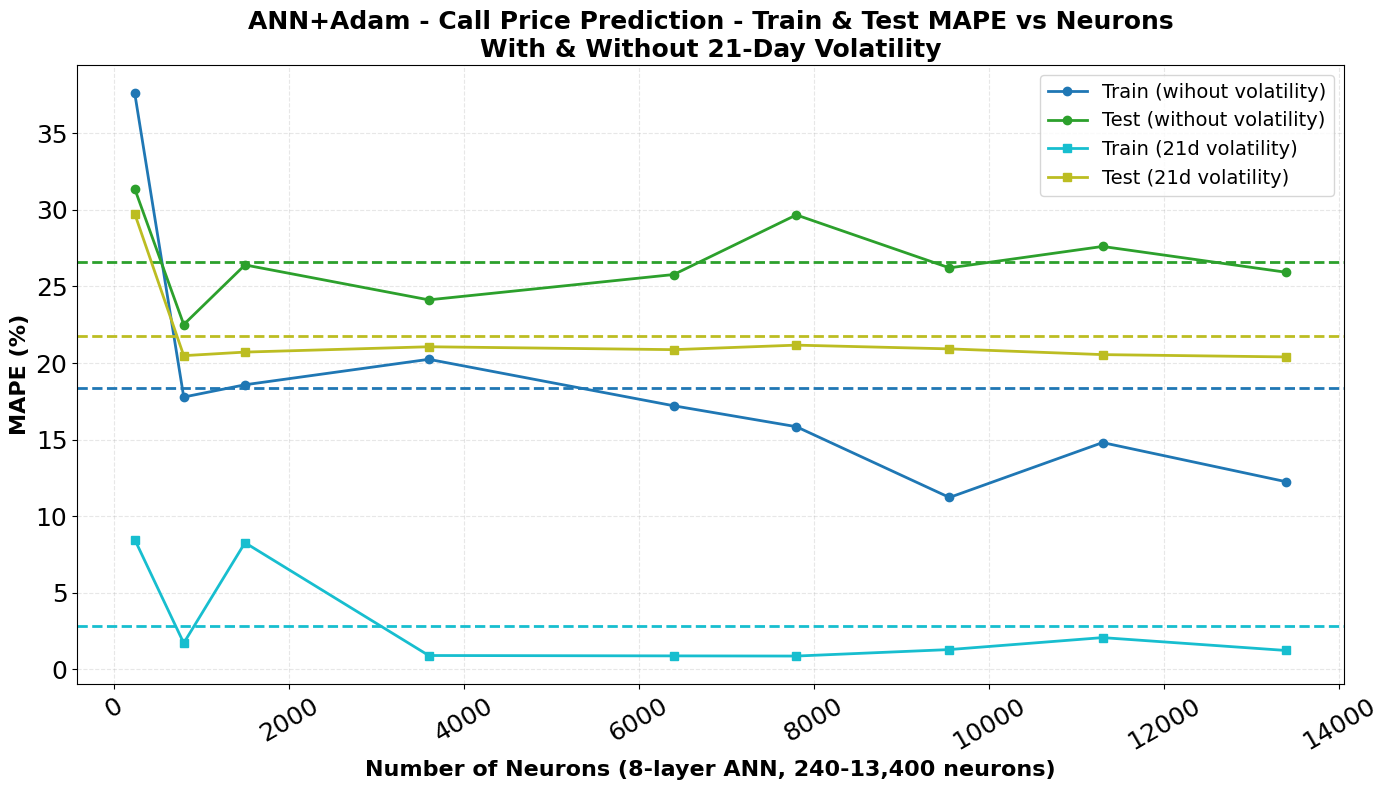

Saved plot: MapeANN_Call_TrainTest.pdf


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import re

# -----------------------------
# DATA + PREPROCESSING
# -----------------------------
data = {
    'ANN Call Train': [37.61424232835,8.47102242948452,17.7758384813962,1.71088067133239,18.578728824779,8.26383745817477,20.2407159106383,0.897953854711451,17.2055488038369,0.873968820356537,15.8416732012928,0.8628911387789286,11.21901915879077,1.286419762492377,14.80326040491012,2.067086737774384,12.24366445343166,1.22566870611108],
    'ANN Put Train': [27.88417395621243,8.538164510273969,13.55539564871344,0.9569601912165118,25.68226201638513,0.6478320520701414,21.47717467933424,0.6325837877701853,22.92868825138191,8.115519625858173,19.23638040476362,1.778483421074023,19.59932892985217,0.8938709171383041,12.39747061753496,2.683071814281046,23.36475005505679,7.159612964499647],
    'ANN Call Test':  [31.3774324248496,29.7428353117683,22.5119983997231,20.4791728543449,26.4042111824101,20.7125444860457,24.1230357298448,21.0606040275092,25.7782828236587,20.8717708973205,29.67080719353559,21.16678175936631,26.21213633994035,20.92225445314068,27.61173443877239,20.54789648980897,25.92372022712264,20.39619140512618],
    'ANN Put Test':  [34.13278142537609,27.14954610462984,30.34285419993306,23.45407703536833,31.39400461148237,22.9023257649299,29.41332771384581,22.58138360199363,41.53542934320619,23.9826758016,27.77837650202283,22.80981322290199,28.22324411604606,22.27672073195214,26.41696259318461,21.78075056046158,23.79334438428394,21.22555203531711],
}

configs = [
    '(240n, no v)', '(240n, with 21d v)',
    '(800n, no v)', '(800n, with 21d v)',
    '(1500n, no v)', '(1500n, with 21d v)',
    '(3600n, no v)', '(3600n, with 21d v)',
    '(6400n, no v)', '(6400n, with 21d v)',
    '(7800n, no v)', '(7800n, with 21d v)',
    '(9550n, no v)', '(9550n, with 21d v)',
    '(11300n, no v)', '(11300n, with 21d v)',
    '(13400n, no v)', '(13400n, with 21d v)',
]

df = pd.DataFrame(data, index=configs)
df["Neurons"] = df.index.map(lambda x: int(re.search(r"(\d+)n", x).group(1)))
df["Volatility"] = df.index.map(lambda x: "no v" if "no v" in x else "21d v")

df_no_v = df[df["Volatility"] == "no v"].copy().sort_values("Neurons")
df_v21d = df[df["Volatility"] == "21d v"].copy().sort_values("Neurons")

# -----------------------------
# SINGLE COMBINED PLOT
# -----------------------------
fig, ax = plt.subplots(figsize=(14, 8))

# Color scheme
colors_no_v = {"Train": "#1f77b4", "Test": "#2ca02c"}
colors_v21d = {"Train": "#17becf", "Test": "#bcbd22"}

# ---- Plot WITHOUT volatility ----
ax.plot(df_no_v["Neurons"], df_no_v["ANN Call Train"],
        color=colors_no_v["Train"], linewidth=2, marker='o', markersize=6)
ax.plot(df_no_v["Neurons"], df_no_v["ANN Call Test"],
        color=colors_no_v["Test"], linewidth=2, marker='o', markersize=6)

# Mean lines (no v)
ax.axhline(df_no_v["ANN Call Train"].mean(), color=colors_no_v["Train"], linestyle="--", linewidth=2)
ax.axhline(df_no_v["ANN Call Test"].mean(), color=colors_no_v["Test"], linestyle="--", linewidth=2)

# ---- Plot WITH volatility ----
ax.plot(df_v21d["Neurons"], df_v21d["ANN Call Train"],
        color=colors_v21d["Train"], linewidth=2, marker='s', markersize=6)
ax.plot(df_v21d["Neurons"], df_v21d["ANN Call Test"],
        color=colors_v21d["Test"], linewidth=2, marker='s', markersize=6)

# Mean lines (21d v)
ax.axhline(df_v21d["ANN Call Train"].mean(), color=colors_v21d["Train"], linestyle="--", linewidth=2)
ax.axhline(df_v21d["ANN Call Test"].mean(), color=colors_v21d["Test"], linestyle="--", linewidth=2)

# -----------------------------
# Formatting
# -----------------------------
ax.set_xlabel("Number of Neurons (8-layer ANN, 240-13,400 neurons)", fontsize=16, fontweight="bold")
ax.set_ylabel("MAPE (%)", fontsize=16, fontweight="bold")
ax.set_title("ANN+Adam - Call Price Prediction - Train & Test MAPE vs Neurons\nWith & Without 21-Day Volatility",
             fontsize=18, fontweight="bold")
ax.tick_params(axis="x", rotation=30, labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(True, linestyle="--", alpha=0.3)

# Legend
legend_elements = [
    Line2D([0], [0], color=colors_no_v["Train"], lw=2, marker='o', label="Train (wihout volatility)"),
    Line2D([0], [0], color=colors_no_v["Test"], lw=2, marker='o', label="Test (without volatility)"),
    Line2D([0], [0], color=colors_v21d["Train"], lw=2, marker='s', label="Train (21d volatility)"),
    Line2D([0], [0], color=colors_v21d["Test"], lw=2, marker='s', label="Test (21d volatility)"),
]

ax.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.savefig("MapeANN_Call_TrainTest.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

print("Saved plot: MapeANN_Call_TrainTest.pdf")
